In [1]:
import h5py
import librosa
import numpy as np

file = h5py.File('E:/dataset_6ms.h5', 'r')

print(file['label'].shape)
# labels = file['label'][:36406].squeeze()

gender_labels = file['gender'][...].squeeze().astype(str)
print('done!')
male_indexes =  np.where(gender_labels == 'male')
femmale_indexes =  np.where(gender_labels == 'female')

print('done!')
y = file['label'][...]
print('done!')
X = file['mel_spec'][...]
print('done!')

X.shape, y.shape

(44344, 1)
done!
done!
done!
done!


((44344, 128, 50), (44344, 1))

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29710, 128, 50), (14634, 128, 50), (29710, 1), (14634, 1))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalizationV2, GlobalMaxPooling2D
from keras.layers import Flatten, Dropout, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Reshape
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import adam_v2
import keras

# import rms prop from keras

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
opt = adam_v2.Adam(learning_rate=0.0007)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

feature_shape = X_train[0].shape
print(feature_shape)
model = Sequential()
model.add(Reshape(target_shape=(
    feature_shape[0], feature_shape[1], 1), input_shape=(feature_shape[0], feature_shape[1])))
    
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((3, 3), strides=(2,1), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,1)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
# model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
# model.add(MaxPooling2D((5, 5)))
# model.add(Dropout(0.2))
# model.add(BatchNormalizationV2(axis=0))

# model.add(GlobalMaxPooling2D())
model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])


(128, 50)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 128, 50, 1)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 50, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 25, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 25, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 25, 64)       0         
 2D)                                        

In [8]:
cnnhistory=model.fit(X_train, y_train, batch_size=600, epochs=200,validation_data=(X_test, y_test), callbacks=[es], verbose=2)

Epoch 1/200


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_1/dropout_4/dropout/random_uniform/RandomUniform' defined at (most recent call last):
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Julio\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Julio\AppData\Local\Temp\ipykernel_14060\3425330659.py", line 1, in <cell line: 1>
      cnnhistory=model.fit(X_train, y_train, batch_size=700, epochs=200,validation_data=(X_test, y_test), callbacks=[es], verbose=2)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\core\dropout.py", line 111, in call
      output = control_flow_util.smart_cond(training, dropped_inputs,
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\control_flow_util.py", line 105, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\core\dropout.py", line 108, in dropped_inputs
      return self._random_generator.dropout(
    File "c:\Users\Julio\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 1940, in dropout
      return tf.nn.dropout(inputs, rate=rate, noise_shape=noise_shape,
Node: 'sequential_1/dropout_4/dropout/random_uniform/RandomUniform'
OOM when allocating tensor with shape[600,32,25,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_1/dropout_4/dropout/random_uniform/RandomUniform}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_18144]

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

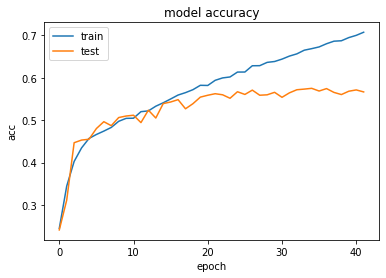

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val acc'], loc='upper left')
plt.show()

In [ ]:
cnnhistory.model.save('cnn_60.h5')